# Solving Poisson's Equation via Finite Difference

## Overview:
In this worksheet you'll use MATLAB's matrix capabilities to solve the most common second-order elliptic PDE - Poisson's equation.

**Objectives:**
- Test your existing knowledge of MATLAB
- Introduce some techniques and commands that will be exploited in Numerical Methods courses

## Constructing the Finite Difference Matrix

Let $\Omega = [0,1]\times[0,1]$ be the unit square domain, with boundary $\partial\Omega$. 
We will be using a Finite Difference method to obtain a numerial solution to Poisson's equation on $\Omega$, subject to homogeneous Dirichlet boundary conditions:

$$
\begin{align} 
    \nabla^{2}u(\mathbf{x}) &= f(\mathbf{x}) &\quad \mathbf{x}\in\Omega \\
    u\vert_{\partial\Omega} &= 0.
\end{align}
$$

The function $u$ is the solution that we seek and $f$ is a known source term.


To begin the Finite Difference implementation, we first need to choose a *mesh* for $\Omega$, on which we will approximate the solution $u$.


Taking $N\in\mathbb{N}$ we uniformly discretise in the $x$- and $y$- directions with $N$ interior points, so we obtain $N+2$ points in each direction:

$$
\begin{align}
x_{i} = \frac{i}{N+1}, &\quad y_{j} = \frac{j}{N+1} &\quad i,j\in\{0,...,N+1\}
\end{align}
$$

and the set of all pairings $(x_{i}, y_{j})$ details the points on the mesh.


It's also useful to introduce the mesh *diameter* or *parameter*, $h = \frac{1}{N+1}$; as well as some convenient notation:

$$
\begin{align}
u_{i,j} := u\left(x_{i},y_{j}\right) \text{ and } f_{i,j} := f\left(x_{i},y_{j}\right)
\end{align}
$$


Next we write down the difference equations to approximate the Laplacian in each direction:

$$
\begin{align}
    \frac{\partial^{2} u_{i,j}}{\partial x^{2}} &\approx \frac{u_{i-1,j} -2u_{i,j} + u_{i-1,j} }{h^{2}} \\
    \frac{\partial^{2} u_{i,j}}{\partial y^{2}} &\approx \frac{u_{i,j-1} -2u_{i,j} + u_{i,j-1} }{h^{2}}
\end{align}
$$

and so our approximate system of equations, which approximate Poisson's equation on our mesh, is

$$
\begin{align}\label{eq:fd}
    \frac{1}{h^{2}}\left(-u_{i-1,j} -u_{i,j-1} +4u_{i,j} -u_{i+1,j+1} -u_{i,j+1} \right) &= f\left(x_{i}, y_{j}\right), &\quad \forall i,j\in\{1,...,N\}.
\end{align}
$$

We only need to determine $u_{i,j}$ at interior mesh points; because of the homogeneous Dirichlet conditions we know that $u_{0,j} = u_{N+1,j} = u_{i,0} = u_{i,N+1} = 0$. Therefore the previous system of equations is a system of $N^{2}$ equations in $N^{2}$ unknowns, and we can represent the system in matrix form as

$$
\begin{align}
    M\mathbf{U} = -\mathbf{F}.
\end{align}
$$

Here $\mathbf{U}$ is a vector of the $u_{i,j}$,  $\mathbf{F}$ is a vector of the $f_{i,j}$, and $M$ is the finite difference matrix

$$
    M = \frac{1}{h^{2}}\left[\left(\mathrm{tridiag}_{N}(-1,2,-1) \otimes I_{N}\right) +  \left(I_{N} \otimes\mathrm{tridiag}_{N}(-1,2,-1)\right)\right]
$$

where $\otimes$ denotes the Kronecker product and $\mathrm{tridiag}_{N}(-1,2,-1)$ denotes the $N\times N$ matrix with $2$ on the leading diagonal and $-1$ on the first super- and sub- diagonals.

The elements of $\mathbf{U}$ and $\mathbf{F}$ are ordered in $x$ then $y$ - this ordering is automatically compatable with MATLAB's reshape command). That is, $\mathbf{U} = \left(u_{1,1}, u_{2,1}, ..., u_{N,1}, u_{1,2}, u_{2,2}, ... , u_{N-1,N}, u_{N,N} \right)^{\top}$, and the elements of $\mathbf{F}$ are similar.

Finding an approximation to the true solution $u$ then amounts to solving the linear system $M\mathbf{U} = -\mathbf{F}$ for $\mathbf{U}$, which can be done with MATLAB's `\` operator.

## Setup:
Before you begin working on this worksheet, ensure that MATLAB is working in an empty directory.
Make sure you save any functions or scripts you write for this worksheet in this directory, using the names provided in the tasks.

## Information: Variable Names
In the taks that follow, variables with names formated `like this` refer to MATLAB variables and/or functions, whereas typeset variables $like \mathrm{\:} this$ refer to the mathematical variables above.

## Exercise: 1 - Setting up Finite Differences
Write a function `FDM(N)` which takes one input $N$, and returns the finite-difference matrix $M$ defined above. 
Your function should construct the matrix $M$ efficiently - IE should construct the matrix $\mathrm{tridiag_{N}}(-1,2,-1)$ first, using the `diag` function, and then use the `kron` function to build $M$.

Next, create a script (imaginatively) called `WorksheetScript_Task1_3`. Have this script:
- Request the user for the value of $N$ via the input command; store the input value into a variable (again, imaginatively) called `N`.
- Create the finite difference matrix for this value of `N` using your `FDM` function. Store the matrix in the variable `M`.
- Create a $1\times$ `N` vector, called `x`, that stores the $x$-co-ordinates of the _interior_ mesh points. Do the same for the $y$-co-ordinates, placing them into a vector `y`.
- Create a meshgrid `X,Y` from `x` and `y` for the interior points using the `meshgrid` command.

[Solution]()

## Information: Tips for Exercise 1
When creating the variables `x` and `y`; you may find it easier to use the command `linspace` on the interval $[0,1]$, then cut off the endpoints.

## Solution+: 1 - Setting up Finite Differences
The function `FDM` should look like:

In [1]:
function M = FDM(N)
%The function FDM returns the Finite Difference Matrix for an N-by-N
%uniform mesh of the unit square.
%INPUTS:
%   N : Number of meshpoints in each direction. Square uniform mesh assumed
%OUTPUTS:
%   M : Finite difference matrix corresponding to the mesh as defined.

% Write the identity matrix of size N to a variable
I = eye(N);

% Write the one-dimensional finite-difference matrix
A = 2*I - diag(ones(N-1,1),1) - diag(ones(N-1,1),-1);

% Create the matrix M
M = (N+1)^2*(kron(A,I) + kron(I,A));
    
end %function

The script `WorksheetScript_Task1_3` should look like:

In [2]:
%% Task 1 - Constructing M
% Write function FDM(N)
% Request input N, construct vectors x and y, then meshgrid X,Y.

N = input('Number of interior points to use (N): ');
x = linspace(0,1,N+2);  x = x(2:end-1); %shave off boundary points
y = x;
[X, Y] = meshgrid(x,y); %create meshgrid of points
M = FDM(N); %create finite difference matrix

Number of interior points to use (N):5


:Solution+

## Solving the Poisson Equation

We are interested in the Poisson equation with source term 
$$
\begin{align}
    f(x,y) &= -4\pi\sin(2\pi x)\left[\pi(1+(2y-1)^2)\cos(2\pi(y-0.5)^2)+\sin(2\pi(y-0.5)^2)\right]
\end{align}
$$
which results in the analytic solution
$$
\begin{align}
    u(x,y) &= \sin(2\pi x)\cos(2\pi(y-0.5)^2).
\end{align}
$$

## Exercise: 2 - Source and Analytic Functions
Write a function called `F(z)` which, for any $n\in\mathbb{N}$, takes in a $n\times 2$ vector `z` (so each row is a co-ordinate pair) and returns the source term $f$ evaluated at each of the co-ordinate pairs as an $n\times 1$ _column_ vector.

Write an analogous function `Analytic(z)` which evaluates the exact solution (defined above) with the same input and output formats. 

[Solution]()

## Information: Efficient code
One way to implement the functions `F` and `Anlaytic` would be to use a `for` loop over each of the rows in the input `z`.
However for large inputs this is makes the execution of your code slow, IE less efficient.

Instead of using a `for` loop, you should look to vectorise your code. Also remember that most of MATLAB's internal math-functions like `sin` and `cos` act element-wise on vectors by default too!

## Solution+: 2 - Source and Analytic Functions
The functions `F` and `Analytic` should look like this:

In [3]:
function [ val ] = F( z )
%Evaluates the source term of the PDE. 
%INPUTS:
%   z : n x 2 matrix where each row contains a coordinate pair.
%OUTPUTS:
%   val : The source term evaluated at each of the input co-ordinate pairs.

% Calculate the source ensuring that element-wise multiplication is
% used
val = -4*pi*sin(2*pi*z(:,1)).*(cos(2*pi*(z(:,2)-0.5).^2).*pi.*(1+(2*z(:,2)-1).^2)+sin(2*pi*(z(:,2)-0.5).^2));

end %function

function [ val ] = Analytic( z )
%Evaluates the analytic solution of the PDE.
%INPUTS:
%   z : n x 2 matrix where each row contains a coordinate pair.
%OUTPUTS:
%   val : evaluation of the analytic solution at each of the input co-ordinate pairs.

val = sin(2*pi*z(:,1)).*cos(((z(:,2)-0.5).^2)*2*pi);

end %function

:Solution+

## Exercise: 3 - Solving the System
In your script `WorksheetScript_Task1_3`, evaluate `F` and `Analytic` at each of the meshpoints $x_{i,j}$, placing the result into vectors called `source` (for the output of `F`) and `uExact` (for the output of `Analytic`).

You now have everything you need to solve the matrix problem - compute the solution to $M\mathbf{U}=-\mathbf{F}$ and store it in a vector `uApprox`.
Then:
- Create a surface plot of the solution; to do this you will need to reshape the solution vector `uApprox` into an $N\times N$ matrix (use of the `reshape` command should be sufficient).
- Print the error $||$ `uApprox` - `uExact` $||_{2}$ to the screen, where $||\cdot||_{2}$ is the vector 2-norm, to 7 decimal places and in scientific format.

[Solution]()

## Information: Non-zero boundary values in your surface plot?
Note that `uApprox` is only the solution on the interior of $\Omega$ - so don't expect the surface plot to be $0$ at the edges!

## Solution+: 3 - Solving the System
At this point your `WorksheetScript_Task1_3` should look something like this:

Number of interior points to use (N):5
The error is 0.2567419 


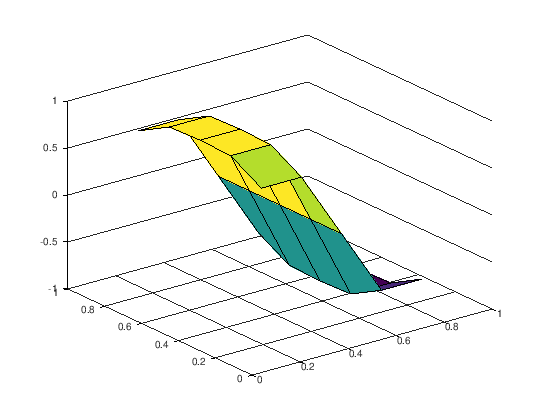

In [4]:
%% Task 0 - Preliminaries
% Good practice to delete all variables and clear all figures before we
% start.
clear;
close all;

%% Task 1 - Constructing M
% Write function FDM(N)
% Request N, construct vectors x and y, then meshgrid X,Y.

N = input('Number of interior points to use (N): ');
x = linspace(0,1,N+2);  x = x(2:end-1); %shave off boundary points
y = x;
[X, Y] = meshgrid(x,y); %create meshgrid of points
M = FDM(N); %create finite difference matrix

%% Task 2 - Source and analytic functions
% Write the following functions:
% Source function F(z)
% Analytic solution function

%% Task 3 - Solving the system
% Evaluate the source and analytic solution on all (x,y) pairs
source = F([X(:),Y(:)]);
uExact = Analytic([X(:),Y(:)]);

% Solve the system AU = F using the backslash operator
uApprox = -M\source;

% Plot the approximate solution on a surface plot
figure()
surf(x,y,reshape(uApprox,N,N))

% Print the error
err = norm(uApprox - uExact);
fprintf('The error is %.7f \n',err)

:Solution+

## Examining the Error
As $h$ decreases, our approximate solution `uApprox` converges to the analytic solution $u$.
A common point of interest is how <q>fast</q> this convergence is; one way we can examine this is by looking at how the error in our solution decays with the mesh size.

We hypothesize that $ || u - $ `uApprox` $ ||_2 = C h^{\alpha}$ for some constants $C$ and $\alpha$, where $\alpha$ is the rate that we want to estimate.
<br />If we denote $E = || u - $ `uApprox` $ ||_2 $, then taking logarithms yields $ \log E = \alpha \log h + \log C $, and so if we can obtain a set of values for $E$ and the corresponding mesh gize $h$, we can predict $\alpha$ via a least-squares (regression) fit.

## Exercise: 4 - Error Analysis
Create a new script `WorksheetScript_Task4` (you know, I won an award for creativity once).
- At the start of this script define the variable `NRange = 5:5:75` - this vector contains the values of `N` you will loop over to obtain estimates for $E$ and $h$ pairs.
- Also preallocate a vector of zeros (called `errVec`) to store the value of the error $E = ||$ `uApprox` - `uExact` $||_{2}$ for each value of $N$; and create a vector `hRange` to store the corresponding values of $h$.
- Then using a `for` loop and the code from your previous script as inspiration, compute $E$ for each value of $N$ in `NRange` and store it in `errVec`. Make sure that the entries of `errVec` and `hRange` correctly correspond to each other!

Once your script has computed the error for each value of $N$, have it:
- Create a log-log plot of the error $E$ against the mesh size $h$
- Use the `polyfit` command to estimate the value of $\alpha$; printing it to the screen to 5 decimal places.
- Check (manually) that this value is consistent with your plot!

[Solution]()

## Solution+: 4 - Error Analysis
Your new script should now look like this:

Estimated convergence rate is 0.99964 


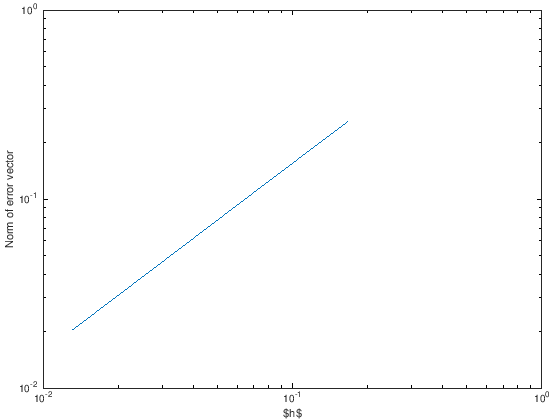

In [5]:
%% Task 4 - Error Analysis
% Good practive to clear all our variables and figures before we start
clear;
close all;

% Create a range of values for N
NRange = 5:5:75;
hRange = 1./(NRange+1);

% Pre-allocate a vector to contain the errors
errVec = zeros(1,length(NRange));

% Loop over the values of N, completing task 3 for each
for i = 1:length(NRange)
    
    % Extract the value of N, and calculate the meshgrid
    N = NRange(i);
    x = linspace(0,1,N+2);
    x = x(2:end-1);
    y = x;
    [X,Y] = meshgrid(x,y);
    
    % Use FDM to construct the M matrix
    M = FDM(N);
    
    % Evaluate source and analytic solution on all (x,y) pairs
    source = F([X(:),Y(:)]);
    uExact = Analytic([X(:),Y(:)]);
    
    %Solve the system AU = -F using the backslash operator
    uApprox = -M\source;
    
    %Store the error
    errVec(i) = norm(uApprox - uExact);
end %for

% Log-log plot of h vs errVec
figure;
loglog(hRange,errVec);
xlabel('$h$','interpreter','latex');
ylabel('Norm of error vector','interpreter','latex');

% Use polyfit to estimate the rate of convergence
% E = C*h^alpha so ln(E) = alpha*ln(h) + ln(C)
% Fit a degree 1 polynomial
pCoeffs = polyfit(log(hRange), log(errVec), 1);
alpha = pCoeffs(1);
% Print out the estimated convergence rate
fprintf('Estimated convergence rate is %.5f \n',alpha);

The value of $\alpha$ should be close to $1.0$, and your log-log plot should look linear!

:Solution+

## Key Points:
- MATLAB code is best written in vectorised form, to speed up computation.
- We can empirically estimate the convergence rate of numerical methods by manipulating the expected form for the convergence and using `polyfit`.

If you've got to this point, congratulations! You're ready for anything (MATLAB-wise) that we can throw at you.